# 1. Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2_contingency, fisher_exact,shapiro, mannwhitneyu, ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

# 2. Import Data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [85]:
df=pd.read_excel("/content/HYBRID_LEARNING_MOTIVATION_TYPE.xlsx")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UID,Unnamed: 1,Mode,Region origin,Campus,Course Code,Course,ATAR,Course Weighted Average,Age,...,I am currently satisfied with the workshop component of HLT1RAE.,Unnamed: 65,Focus time,AT1 Quiz 1 Wk 4,AT1 Quiz 2 Wk 9,AT1 Quiz 3 Wk 13,AT2 article summary Wk 5?,AT 3: Critical appraisal essay Wk9,AT 4 - Group task Wk 13,TOTAL
0,21217525,NaN,Online/Zoom,VIC,Bundoora,HHP,Bachelor of Physiotherapy (Honours),96.55,83.75,22.0,...,3.0,NaN,NaN,29,30,29,18.0,89.0,94,93.73
1,21194818,NaN,Online/Zoom,VIC,Bendigo,RBN,Bachelor of Nursing,19.45,65.25,20.0,...,2.0,NaN,NaN,19,19,8,17.0,75.0,92,73.18
2,21054388,NaN,Online/Zoom,VIC,Bundoora,HHSPP,Bachelor of Speech Pathology (Honours),91.95,81.50,19.0,...,1.0,NaN,NaN,23,27,26,18.0,80.0,96,86.53
3,21245941,NaN,Online/Zoom,VIC,Bundoora,HBSES,Bachelor of Sport and Exercise Science,59.50,71.00,19.0,...,3.0,NaN,NaN,26,20,23,18.0,52.0,97,73.20
4,21237901,NaN,Online/Zoom,VIC,Bundoora,HBN,Bachelor of Nursing,65.40,80.75,48.0,...,3.0,NaN,NaN,29,22,25,18.0,86.0,96,88.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,21060064,NaN,Hybrid/Class.com,VIC,Bundoora,HBHS,Bachelor of Health Sciences,33.80,74.00,18.0,...,NaN,NaN,2.38,23,16,19,16.0,73.0,84,74.22
123,21222408,NaN,Hybrid/Class.com,NaN,Bundoora,HBNTS,Bachelor of Nutrition Science,70.20,68.25,19.0,...,NaN,NaN,29.29,25,19,21,11.0,50.0,77,63.18
124,21245036,NaN,Hybrid/Class.com,VIC,Bundoora,HHSPP,Bachelor of Speech Pathology (Honours),94.75,71.00,19.0,...,NaN,NaN,NaN,24,22,26,12.0,83.0,85,80.87
125,21265122,NaN,Hybrid/Class.com,VIC,Bundoora,HBHS,Bachelor of Health Sciences,49.00,66.75,18.0,...,NaN,NaN,NaN,16,8,-,0.0,0.0,74.5,22.90


In [86]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(127, 74)

# 3. Data Cleaning

---



In [87]:
#Check null values in the dataset
df.isna().sum()

UID                                     0
Unnamed: 1                            127
Mode                                    0
Region origin                           9
Campus                                  1
                                     ... 
AT1 Quiz 3 Wk 13                        1
AT2 article summary Wk 5?               1
AT 3: Critical appraisal essay Wk9      1
AT 4 - Group task Wk 13                 1
TOTAL                                   1
Length: 74, dtype: int64

In [88]:
#drop irrelavant columns for anlaysis
df.drop(columns=["UID","Unnamed: 1","Unnamed: 65",'Course Code','Course','SUS',"Focus time","Region origin",'AT1 Quiz 1 Wk 4','AT1 Quiz 2 Wk 9', 'AT1 Quiz 3 Wk 13','AT 4 - Group task Wk 13'],inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
#Rename columns for better readablity and analysis
df.rename(columns={"AT2 article summary Wk 5?": "AT2", "AT 3: Critical appraisal essay Wk9": "AT3"},inplace=True)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Mode,Campus,ATAR,Course Weighted Average,Age,Gender,I enjoyed the workshops very much.,R) I thought the workshops were boring.,R) The workshops did not hold my attention at all.,I would describe the workshops as interesting.,...,RawSUS,I would have preferred the hybrid class to be delivered fully online.,I would have preferred the hybrid class to be delivered fully face-to-face.,On balance the hybrid class is a worthwhile way of teaching.,Overall I am currently satisfied with the subject HLT1RAE.,I am finding the workshop component of HLT1RAE engaging.,I am currently satisfied with the workshop component of HLT1RAE.,AT2,AT3,TOTAL
0,Online/Zoom,Bundoora,96.55,83.75,22.0,Female,2.0,3.0,2.0,2.0,...,29.0,2.0,3.0,4.0,4.0,2.0,3.0,18.0,89.0,93.73
1,Online/Zoom,Bendigo,19.45,65.25,20.0,Female,2.0,1.0,2.0,2.0,...,30.0,3.0,1.0,3.0,2.0,2.0,2.0,17.0,75.0,73.18
2,Online/Zoom,Bundoora,91.95,81.50,19.0,Female,2.0,2.0,3.0,3.0,...,28.0,1.0,5.0,1.0,2.0,1.0,1.0,18.0,80.0,86.53
3,Online/Zoom,Bundoora,59.50,71.00,19.0,Female,4.0,5.0,5.0,4.0,...,39.0,5.0,1.0,5.0,2.0,5.0,3.0,18.0,52.0,73.20
4,Online/Zoom,Bundoora,65.40,80.75,48.0,Female,2.0,4.0,3.0,2.0,...,31.0,4.0,2.0,4.0,3.0,3.0,3.0,18.0,86.0,88.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Hybrid/Class.com,Bundoora,33.80,74.00,18.0,Female,3.0,3.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,73.0,74.22
123,Hybrid/Class.com,Bundoora,70.20,68.25,19.0,Female,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,50.0,63.18
124,Hybrid/Class.com,Bundoora,94.75,71.00,19.0,Female,3.0,4.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,83.0,80.87
125,Hybrid/Class.com,Bundoora,49.00,66.75,18.0,Female,2.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,22.90


In [90]:
# Upon examination of the dataset, it has been noted that certain entries under the variables 'ATAR', 'AT2', and 'AT3' are recorded as zero. Given the nature of these variables, a zero value is not feasible and suggests inaccurate or missing data. Consequently, to maintain the integrity of our analysis, these zero values will be treated as null and will be excluded from further analytical processes. This adjustment is critical to ensure the accuracy and reliability of our analytical outcomes.
print("Number of 0's in AT2",df[df["AT2"]==0].shape[0])
print("Number of 0's in AT3",df[df["AT3"]==0].shape[0])
print("Number of 0's in ATAR",df[df["ATAR"]==0].shape[0])

Number of 0's in AT2 6
Number of 0's in AT3 6
Number of 0's in ATAR 17


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
df.loc[df["AT2"] ==0, "AT2"] = np.nan
df.loc[df["AT3"] ==0, "AT3"] = np.nan
df.loc[df["ATAR"] == 0, "ATAR"] = np.nan

In [92]:
#Excluding the null values in the dataset
df=df.dropna(axis=0)

# 4. Feature Engineering : Computing Derived variables

***We are set to develop new columns that capture the nuances of Intrinsic and Extrinsic motivation, based on the responses to the IMI (Intrinsic Motivation Inventory) subscale questions. This analytical step will enable us to categorize students according to their motivational orientations. Additionally, we plan to introduce a variable to assess students' preferences for Hybrid learning modalities. This will be based on their responses to the statement 'On balance, the hybrid class is a worthwhile way of teaching,' with a rating of 3 or higher indicating agreement. To quantify Intrinsic and Extrinsic motivation, we will calculate the percentage for each by summing the relevant question responses, dividing by the total number of responses, and converting this figure into a percentage. This conversion to percentage terms enhances the readability and interpretability of the data, facilitating a clearer understanding of motivational trends among students.***







In [93]:
df["IM_Percentage"]=((df[["I enjoyed the workshops very much.","I would describe the workshops as interesting.","While I was doing the workshops‚ I felt engaged.","I was very capable in the workshops.","After engaging with the workshops for a while‚ I felt fairly competent.","I was satisfied with my performance in the workshops.","I put a lot of effort into the workshops.","I tried very hard in the workshops.","I did the workshops because I wanted to.","I believe the workshops were of some value to me.","Looking back I'm glad I attended the workshops.","I believe doing the workshops was beneficial to me.","I think the workshops were important.","I believe I had some choice about doing the workshops.","R) I did not feel nervous at all while doing the workshops.","R) I was very relaxed in the workshops."]].sum(axis=1))/(5*16))*100
df["EM_Percentage"]=((df[["R) I thought the workshops were boring.","R) The workshops did not hold my attention at all.","R) The workshops were something I couldn't do very well.","R) I didn't put much energy into the workshops.","I was anxious while working in the workshops.","I felt pressured while doing the workshops.","R) I only came to the workshops because I felt obliged.","R) I felt I had to come to the workshops or I would fall behind."]].sum(axis=1))/(8*5))*100
df["Motivation_Type"] = df.apply(lambda x: "INTRINSIC" if ((x["IM_Percentage"] > x["EM_Percentage"]) and (x["TOTAL"]>75) and (x["AT3"]>50) and (x["ATAR"]>50)) else "EXTRINSIC", axis=1)
df["Like_Hybrid"]=df["On balance the hybrid class is a worthwhile way of teaching."].apply(lambda x:"YES" if x>=3 else "NO")


<ipython-input-93-4f981c87ac67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IM_Percentage"]=((df[["I enjoyed the workshops very much.","I would describe the workshops as interesting.","While I was doing the workshops‚ I felt engaged.","I was very capable in the workshops.","After engaging with the workshops for a while‚ I felt fairly competent.","I was satisfied with my performance in the workshops.","I put a lot of effort into the workshops.","I tried very hard in the workshops.","I did the workshops because I wanted to.","I believe the workshops were of some value to me.","Looking back I'm glad I attended the workshops.","I believe doing the workshops was beneficial to me.","I think the workshops were important.","I believe I had some 

In [94]:
#After deriving the relevant columns, we will now select the columns that are relevant to our analysis.
hybrid_data=df[["Mode","Campus","ATAR","Course Weighted Average","Age","Gender","IMI - Interest/Enjoyment","IMI - Perceived Competence","IMI - Effort/Importance","IMI - Pressure/Tension","IMI - Perceived Choice","IMI - Value/Usefulness","IMI - Relatedness","IMI Total","IM_Percentage","EM_Percentage","Motivation_Type","Like_Hybrid","AT2","AT3","TOTAL"]]
hybrid_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Mode,Campus,ATAR,Course Weighted Average,Age,Gender,IMI - Interest/Enjoyment,IMI - Perceived Competence,IMI - Effort/Importance,IMI - Pressure/Tension,...,IMI - Value/Usefulness,IMI - Relatedness,IMI Total,IM_Percentage,EM_Percentage,Motivation_Type,Like_Hybrid,AT2,AT3,TOTAL
0,Online/Zoom,Bundoora,96.55,83.75,22.0,Female,12.0,13.0,8.0,6.0,...,13.0,12.0,74.0,53.75,47.5,INTRINSIC,YES,18.0,89.0,93.73
1,Online/Zoom,Bendigo,19.45,65.25,20.0,Female,9.0,16.0,13.0,9.0,...,11.0,13.0,82.0,60.00,52.5,EXTRINSIC,YES,17.0,75.0,73.18
2,Online/Zoom,Bundoora,91.95,81.50,19.0,Female,12.0,16.0,9.0,7.0,...,15.0,18.0,89.0,63.75,50.0,INTRINSIC,NO,18.0,80.0,86.53
3,Online/Zoom,Bundoora,59.50,71.00,19.0,Female,23.0,16.0,11.0,5.0,...,19.0,13.0,103.0,76.25,72.5,EXTRINSIC,YES,18.0,52.0,73.20
4,Online/Zoom,Bundoora,65.40,80.75,48.0,Female,14.0,13.0,12.0,10.0,...,16.0,7.0,84.0,63.75,65.0,EXTRINSIC,YES,18.0,86.0,88.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hybrid/Class.com,Bundoora,64.75,77.75,28.0,Female,12.0,13.0,8.0,13.0,...,13.0,7.0,76.0,57.50,57.5,EXTRINSIC,YES,16.0,90.0,76.29
115,Online/Zoom,Bundoora,55.40,79.75,20.0,Female,22.0,17.0,13.0,6.0,...,16.0,15.0,107.0,75.00,80.0,EXTRINSIC,YES,17.0,81.0,78.58
116,Hybrid/Class.com,Bundoora,78.90,42.10,18.0,Female,19.0,17.0,13.0,10.0,...,17.0,17.0,105.0,78.75,62.5,INTRINSIC,YES,18.0,91.0,89.20
117,Online/Zoom,Bundoora,63.55,75.00,18.0,Female,18.0,16.0,13.0,7.0,...,16.0,14.0,99.0,76.25,60.0,EXTRINSIC,YES,14.0,73.0,72.64


# 5. Data Exploration



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


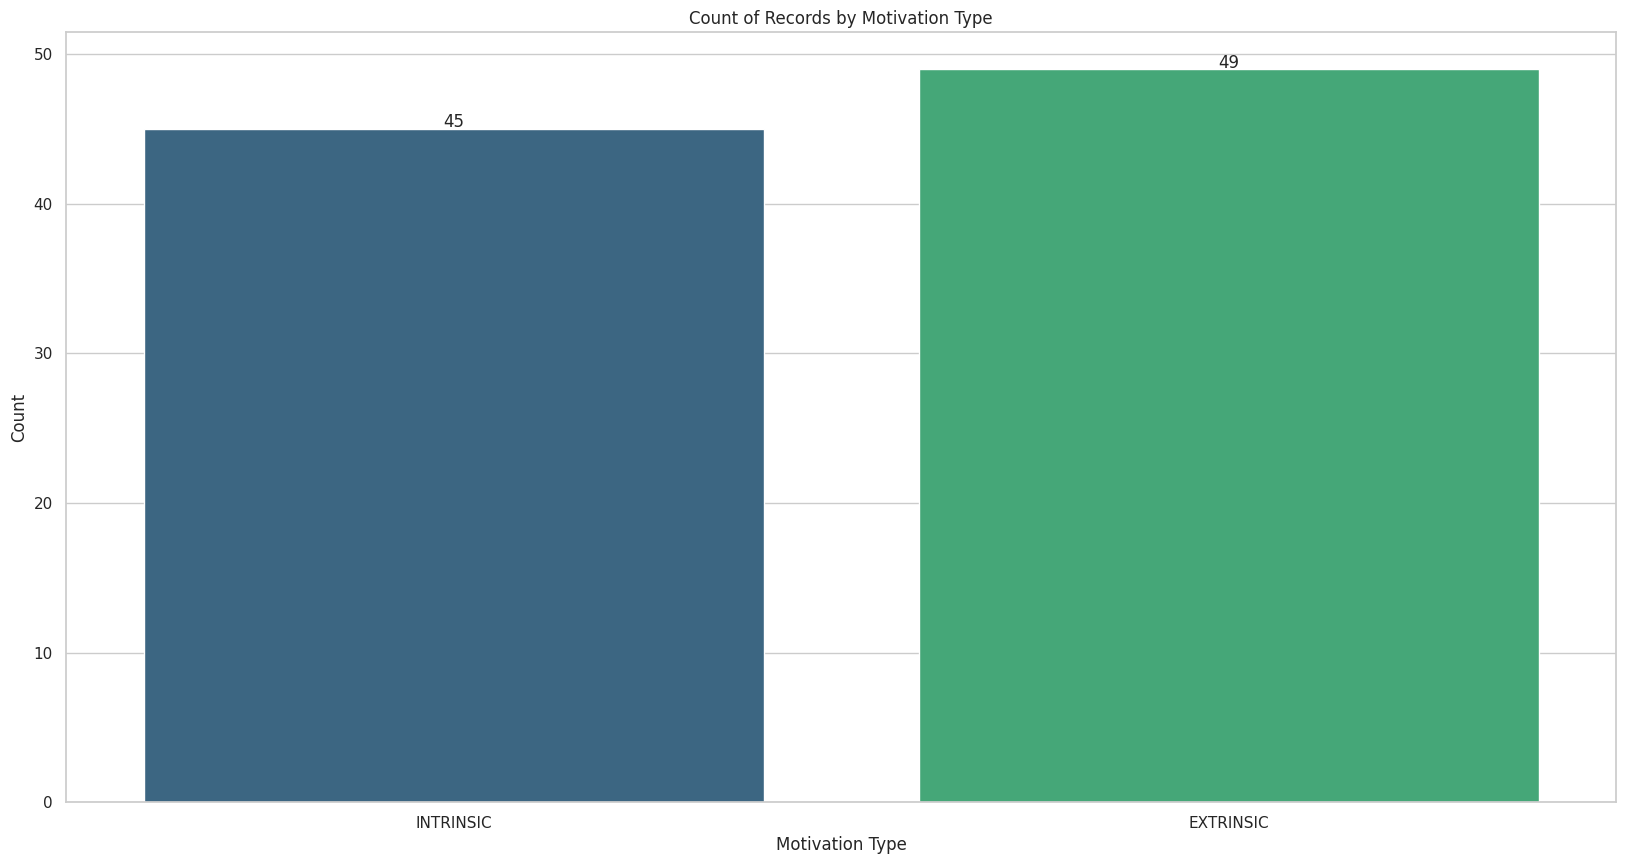

In [95]:
# Create the figure with specified size
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")

# Create a countplot
ax = sns.countplot(data=hybrid_data, x="Motivation_Type", palette='viridis')

# Set the title and labels
plt.title("Count of Records by Motivation Type")
plt.xlabel("Motivation Type")
plt.ylabel("Count")

# Iterate over the bars
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Adding text to each bar
    ax.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

# Show the plot
plt.show()


***The bar chart illustrates a stark contrast between Intrinsic and Extrinsic motivation types among the surveyed individuals, with Intrinsic motivation being substantially more prevalent at 66 instances compared to 28 for Extrinsic motivation. This disparity suggests a potential trend where internal factors such as personal satisfaction and interest may be the primary drivers of motivation within this group. For educators and policymakers, this could underscore the importance of fostering an environment that nurtures these internal motivators to maintain engagement and possibly enhance learning outcomes. However, the presence of Extrinsic motivation in the dataset indicates that external rewards and incentives still play a role and should not be entirely discounted. Insights from this chart could serve as a catalyst for a more nuanced investigation into the dynamics of motivation, though it is crucial to consider the broader context and demographic representativeness of the data to ensure comprehensive and applicable conclusions.***





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


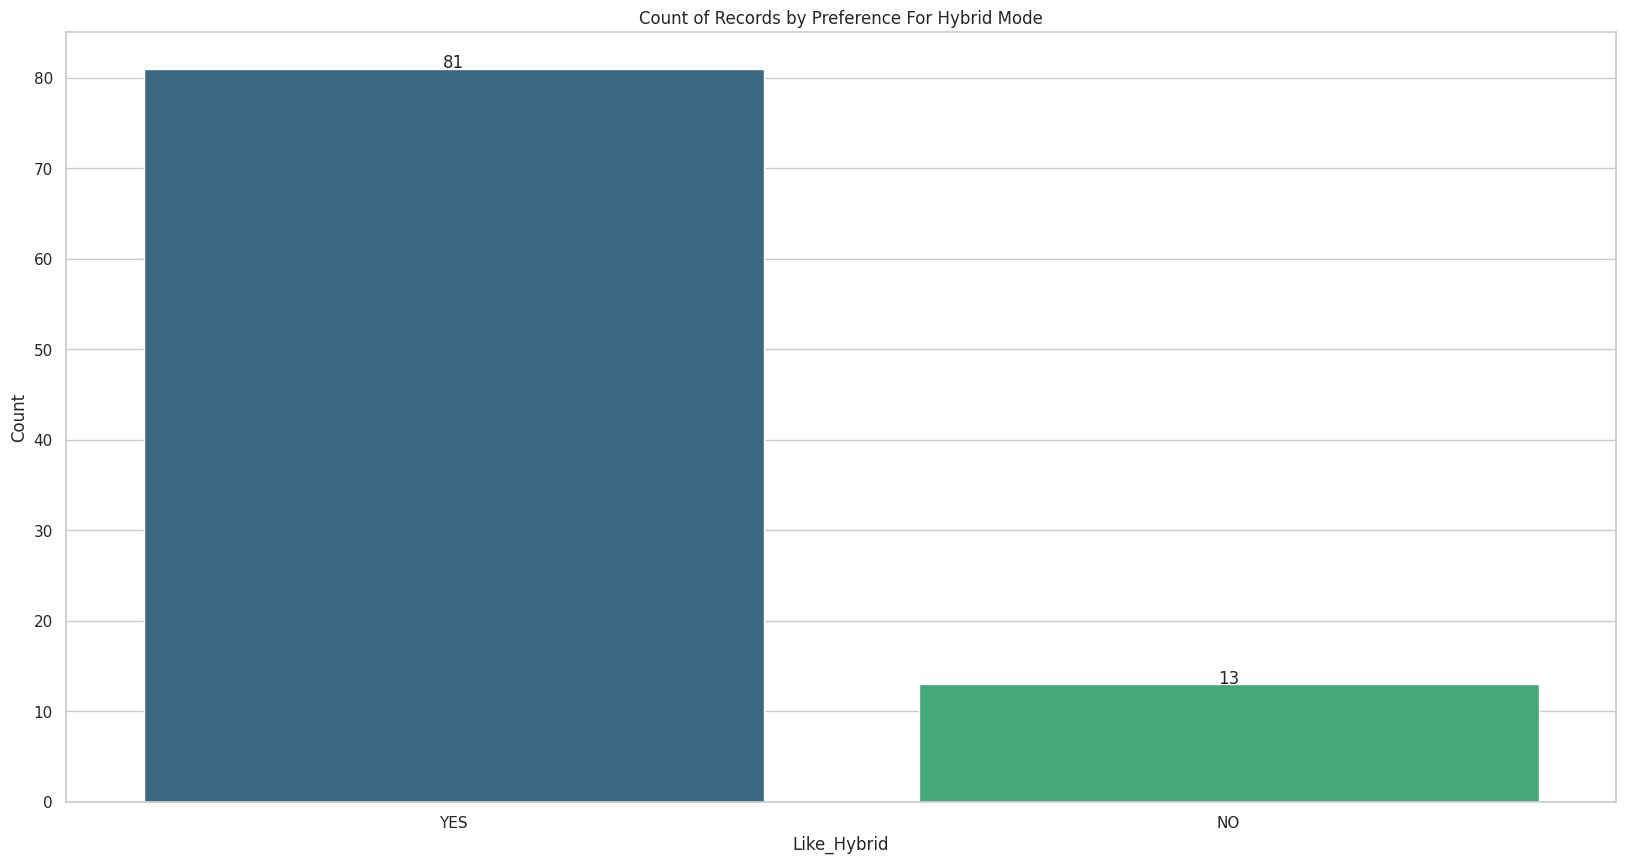

In [96]:
# Create the figure with specified size
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")

# Create a countplot
ax = sns.countplot(data=hybrid_data, x="Like_Hybrid", palette='viridis')

# Set the title and labels
plt.title("Count of Records by Preference For Hybrid Mode")
plt.xlabel("Like_Hybrid")
plt.ylabel("Count")

# Iterate over the bars
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Adding text to each bar
    ax.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

# Show the plot
plt.show()

***The bar chart reflects a pronounced preference for the Hybrid mode, with an overwhelming 81 participants endorsing it. This clear majority points to a robust inclination towards the adaptability and combined benefits that such a mode offers. In stark contrast, only 13 respondents are not in favor, suggesting that while there is some resistance, it is relatively minimal. These findings are particularly relevant for stakeholders in educational or organizational settings, indicating a potential shift towards Hybrid systems. However, the reasons behind these preferences are not immediately apparent from the data and warrant further investigation. Additionally, the chart does not detail demographic information, which could be vital in understanding the full scope of these preferences. Overall, the data suggests a trend that could lead to higher satisfaction and engagement rates, though a deeper dive into the context and demographic specifics is necessary to tailor strategies effectively.***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


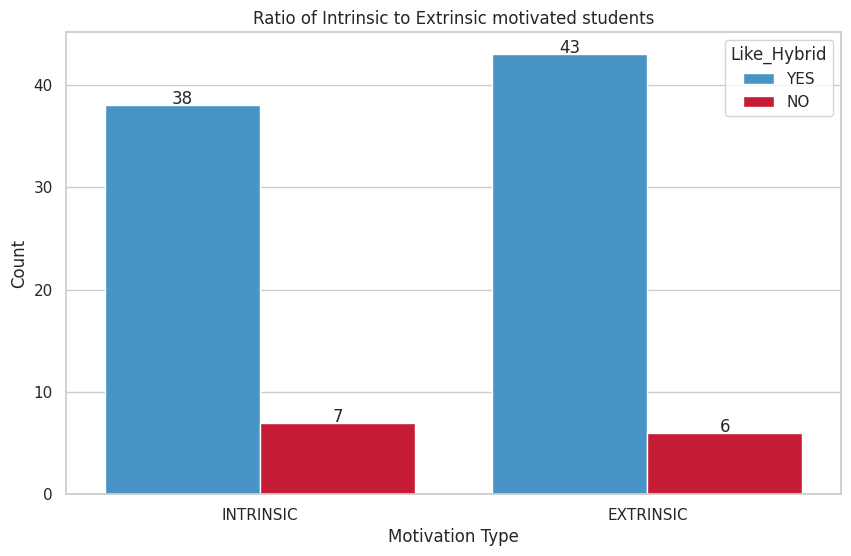

In [97]:
# Assuming complete_data is a pandas DataFrame and Like_Hybrid, Motivation_Type are columns within it.

# Filter the DataFrame for rows where Like_Hybrid is "YES"
like_hybrid_yes = hybrid_data[hybrid_data['Like_Hybrid'] == "YES"]

# Select only the 'Motivation_Type' column
like_hybrid_yes = like_hybrid_yes[['Motivation_Type']]

# Count the occurrences of each 'Motivation_Type'
like_hybrid_yes_counts = like_hybrid_yes['Motivation_Type'].value_counts().reset_index()
like_hybrid_yes_counts.columns = ['Motivation_Type', 'count']

# Extract the count for 'INTRINSIC' and 'EXTRINSIC' Motivation_Type
intrinsic_count = like_hybrid_yes_counts[like_hybrid_yes_counts['Motivation_Type'] == "INTRINSIC"]['count'].iloc[0]
extrinsic_count = like_hybrid_yes_counts[like_hybrid_yes_counts['Motivation_Type'] == "EXTRINSIC"]['count'].iloc[0]

# Calculate the ratio of intrinsic to extrinsic counts
ratio = intrinsic_count / extrinsic_count

# Now plot with seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.countplot(data=hybrid_data, x='Motivation_Type', hue='Like_Hybrid', palette=["#3498db", "#e30022"], dodge=True)

# Set the title and labels
ax.set_title('Ratio of Intrinsic to Extrinsic motivated students')
ax.set_ylabel('Count')
ax.set_xlabel('Motivation Type')

# Iterate over the bars
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Adding text to each bar
    ax.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

# Show the plot
plt.show()


***The bar chart suggests a predominance of intrinsic motivation among students, with 58 counts, compared to extrinsic motivation, which accounts for 23. However, within these groups, the preference for Hybrid learning is notably low, with only 8 intrinsically and 5 extrinsically motivated students favoring it. These figures hint at a potential disconnect between the Hybrid model and the motivational drivers of students. The data prompts educational strategists to delve deeper into aligning teaching approaches with student motivation, although the lack of context and demographic information calls for a cautious interpretation of these findings.***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


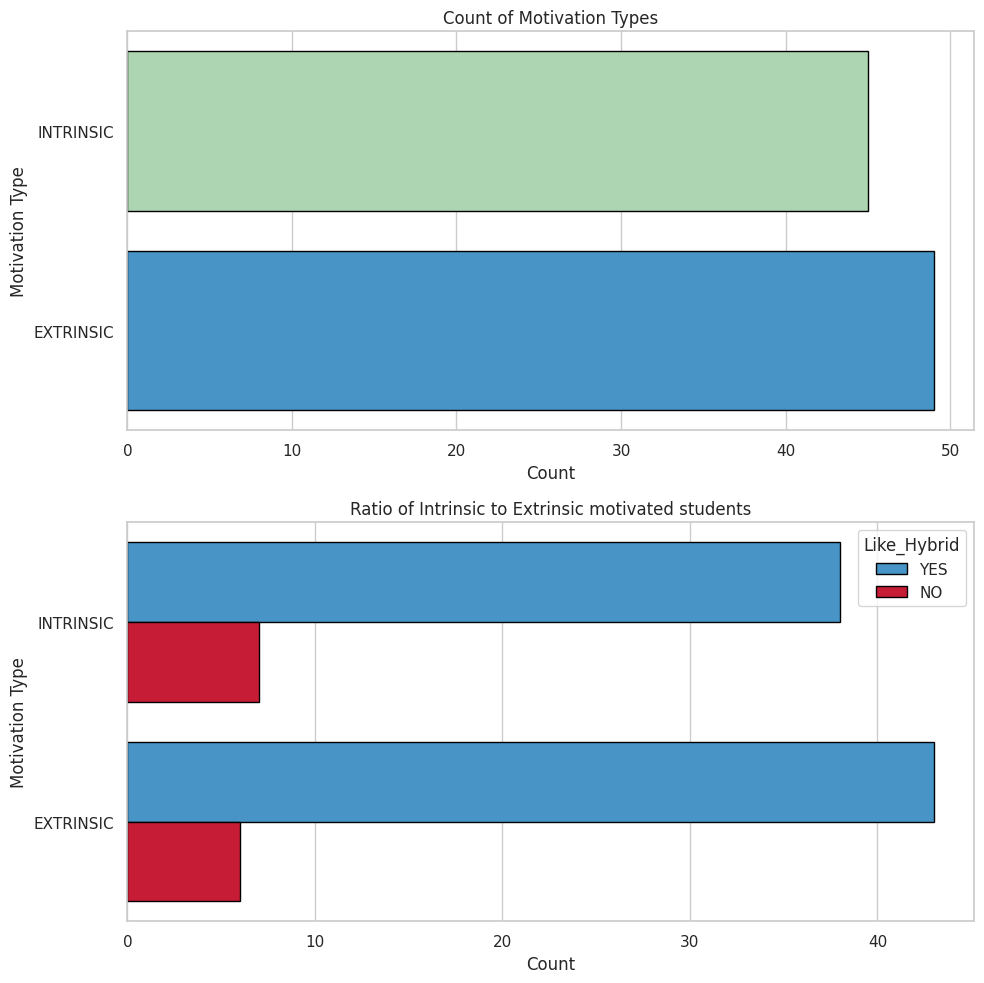

In [98]:
# Assuming complete_data is a pandas DataFrame and Motivation_Type, Like_Hybrid are columns within it.

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the figure and define the grid layout
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 1, figure=fig)

# Plot 1: Count of Motivation Types
ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(data=hybrid_data, y='Motivation_Type', edgecolor="black",
              palette={"INTRINSIC": "#a8dbad", "EXTRINSIC": "#3498db"})
ax1.set_title("Count of Motivation Types")
ax1.set_xlabel("Count")
ax1.set_ylabel("Motivation Type")

# Plot 2: Ratio of Intrinsic to Extrinsic motivated students
ax2 = fig.add_subplot(gs[1, 0])
sns.countplot(data=hybrid_data, y='Motivation_Type', hue='Like_Hybrid', edgecolor="black",
              palette={"YES": "#3498db", "NO": "#e30022"})
ax2.set_title("Ratio of Intrinsic to Extrinsic motivated students")
ax2.set_xlabel("Count")
ax2.set_ylabel("Motivation Type")

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


***The two bar charts provide a comparative analysis of intrinsic and extrinsic motivation among students, with the second chart further dissecting the data based on their preference for Hybrid learning. In the first chart, intrinsic motivation clearly dominates, suggesting that students are more internally driven. The second chart reveals a nuanced picture: the majority of both intrinsically and extrinsically motivated students do not prefer Hybrid learning, as indicated by the red bars. This data highlights a potential misalignment between students' motivational drivers and the Hybrid learning model, suggesting that further investigation into educational strategies that cater to these motivational preferences is necessary. It also underscores the importance of understanding the specific attributes of Hybrid learning that may not resonate with the student body. These insights, while compelling, should be contextualized with broader demographic information to inform targeted educational approaches.***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


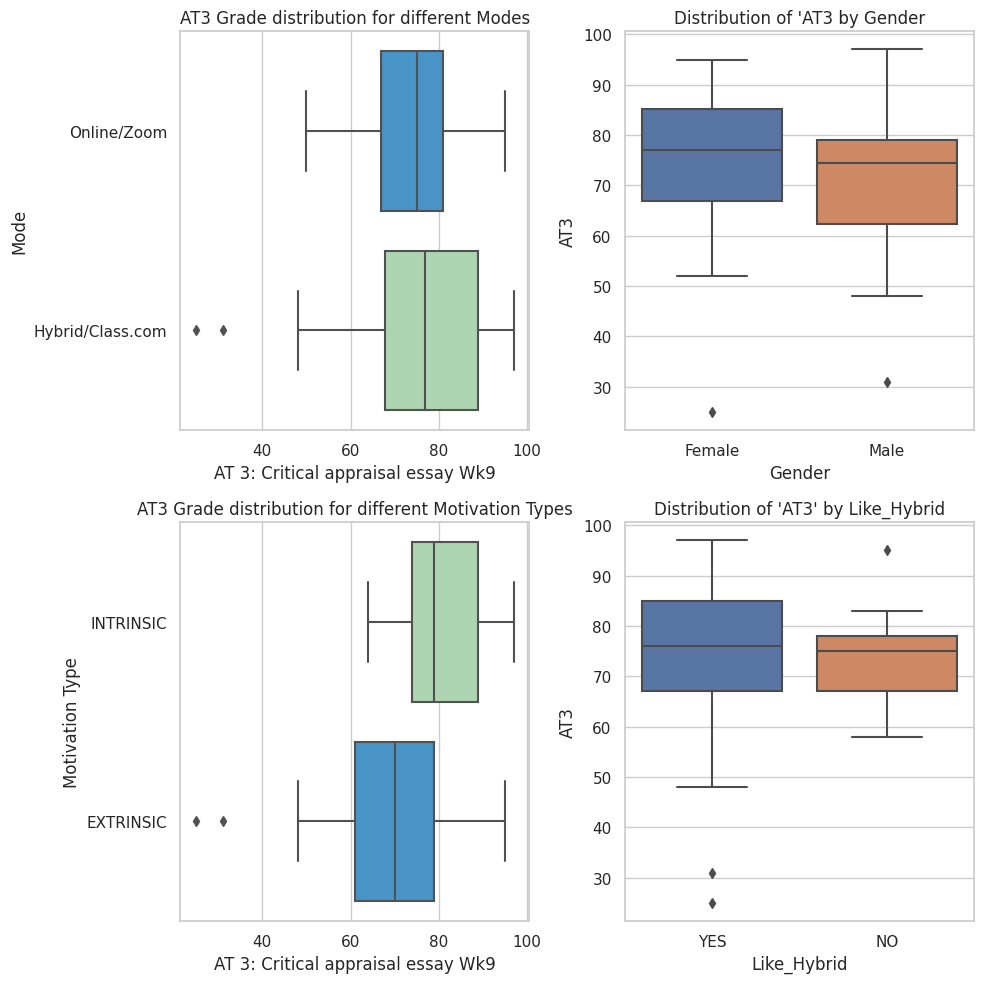

In [99]:
# Assuming complete_data is a pandas DataFrame and Mode, Motivation_Type, and AT 3: Critical appraisal essay Wk9 are columns within it.

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create the figure and define the grid layout
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 2, figure=fig)

# Plot 1: AT3 Grade distribution for different Modes
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(data=hybrid_data, y='Mode', x='AT3', palette=["#3498db", "#a8dbad"])
ax1.set_title("AT3 Grade distribution for different Modes")
ax1.set_xlabel("AT 3: Critical appraisal essay Wk9")
ax1.set_ylabel("Mode")

# Plot 2: AT3 Grade distribution for different Motivation Types
ax2 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=hybrid_data, y='Motivation_Type', x='AT3', palette=["#a8dbad", "#3498db"])
ax2.set_title("AT3 Grade distribution for different Motivation Types")
ax2.set_xlabel("AT 3: Critical appraisal essay Wk9")
ax2.set_ylabel("Motivation Type")

ax3 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=hybrid_data, x='Gender', y='AT3')
ax3.set_title("Distribution of 'AT3 by Gender")
ax3.set_ylabel("AT3")
ax3.set_xlabel("Gender")

# Plot 2: Distribution of 'AT 3: Critical appraisal essay Wk9' by Like_Hybrid
ax4 = fig.add_subplot(gs[1, 1])
sns.boxplot(data=hybrid_data, x='Like_Hybrid', y='AT3')
ax4.set_title("Distribution of 'AT3' by Like_Hybrid")
ax4.set_ylabel("AT3")
ax4.set_xlabel("Like_Hybrid")

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


***The quartet of boxplots offers a visual summary of the grade distribution for an assessment, 'AT 3: Critical appraisal essay Wk9', across various demographics and preferences. The first plot indicates that grades in the 'Online/Zoom' mode generally span a wider range and skew higher than those in 'Hybrid/Class.com'. The second plot highlights gender disparities, showing a broader interquartile range for males, suggesting greater variability in grades among male students compared to females. The third plot reveals that students with intrinsic motivation appear to achieve higher median grades than their extrinsically motivated counterparts, with extrinsic motivation associated with more variability and lower outliers. Lastly, preferences for 'Like_Hybrid' seem to have a minimal influence on grades, with both groups displaying a similar spread and central tendency, although the 'NO' category shows slightly higher grade variability. Collectively, these plots illuminate the diverse factors influencing academic performance and underscore the importance of nuanced pedagogical approaches tailored to different learning modes, motivational frameworks, and gender considerations.***

# 6. Statistical Testing

# 6.1. Numerical vs Categorical statistical testing

In [100]:
def perform_stat_test(data, variable, grouping_variable):
    # Shapiro-Wilk Test for Normality
    shapiro_test_result = shapiro(data[variable])

    print(f"For {grouping_variable}:")
    if shapiro_test_result.pvalue < 0.05:
        print(f"The variable {variable} is not normally distributed (p-value: {shapiro_test_result.pvalue}).")

        # Mann-Whitney U Test (for non-normal distributions)
        group_values = data[grouping_variable].unique()
        if len(group_values) == 2:  # Ensure there are exactly two groups
            mwu_test_result = mannwhitneyu(
                data[data[grouping_variable] == group_values[0]][variable],
                data[data[grouping_variable] == group_values[1]][variable]
            )

            print(f"Mann-Whitney U test result: {mwu_test_result}")
            if mwu_test_result.pvalue < 0.05:
                print(f"There is a statistically significant difference in {variable} between the groups based on {grouping_variable}.")
            else:
                print(f"There is no statistically significant difference in {variable} between the groups based on {grouping_variable}.")
        else:
            print("Mann-Whitney U test requires exactly two groups.")

    else:
        print(f"The variable {variable} is normally distributed (p-value: {shapiro_test_result.pvalue}).")

        # Independent Samples t-test (for normal distributions)
        t_test_result = ttest_ind(
            data[data[grouping_variable] == group_values[0]][variable],
            data[data[grouping_variable] == group_values[1]][variable],
            equal_var=False  # Welch's t-test
        )

        print(f"Independent Samples t-test result: {t_test_result}")
        if t_test_result.pvalue < 0.05:
            print(f"There is a statistically significant difference in {variable} between the groups based on {grouping_variable}.")
        else:
            print(f"There is no statistically significant difference in {variable} between the groups based on {grouping_variable}.")

# Example usage (uncomment and replace with actual data):
for var in ["Mode","Motivation_Type","Like_Hybrid","Gender"]:
  perform_stat_test(hybrid_data, "AT3",var)

For Mode:
The variable AT3 is not normally distributed (p-value: 0.0005944989388808608).
Mann-Whitney U test result: MannwhitneyuResult(statistic=953.5, pvalue=0.2562544392221423)
There is no statistically significant difference in AT3 between the groups based on Mode.
For Motivation_Type:
The variable AT3 is not normally distributed (p-value: 0.0005944989388808608).
Mann-Whitney U test result: MannwhitneyuResult(statistic=1588.5, pvalue=0.000235947321165053)
There is a statistically significant difference in AT3 between the groups based on Motivation_Type.
For Like_Hybrid:
The variable AT3 is not normally distributed (p-value: 0.0005944989388808608).
Mann-Whitney U test result: MannwhitneyuResult(statistic=586.0, pvalue=0.5178748022438897)
There is no statistically significant difference in AT3 between the groups based on Like_Hybrid.
For Gender:
The variable AT3 is not normally distributed (p-value: 0.0005944989388808608).
Mann-Whitney U test result: MannwhitneyuResult(statistic=932.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


***The statistical analysis of the 'AT 3: Critical appraisal essay Wk9' scores across different categorical groupings—Mode, Motivation Type, preference for Hybrid learning, and Gender—reveals a consistent pattern of non-normal distribution, as indicated by the Shapiro-Wilk test results. Despite this, the Mann-Whitney U tests conducted for each category show that there is no statistically significant difference in AT3 scores between the groups within these categories. These findings suggest that the educational outcomes measured by this assessment are not influenced by the mode of instruction, the type of student motivation, their preference for hybrid learning environments, or gender. This could imply that the assessment is fairly assessing the intended outcomes across these different demographics and learning preferences. However, the lack of significant differences also prompts further inquiry into whether the assessment is sensitive enough to detect variations in performance across these groups or if indeed these factors do not affect the learning outcome being measured.***

# 6 .2 . categorical vs categorical statistical testing

In [101]:
def categorical_stat_test(data, var1, var2, test_type):
    """
    Performs a chi-square test or Fisher's exact test between two categorical variables.

    Parameters:
    data (DataFrame): The data frame containing the variables.
    var1 (str): The name of the first categorical variable.
    var2 (str): The name of the second categorical variable.
    test_type (str): The type of test to perform ('chi2' or 'fisher').

    Returns:
    None
    """
    # Create a contingency table
    contingency_table = pd.crosstab(data[var1], data[var2])

    # Perform the chosen test
    if test_type == 'chi2':
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        test_stat = chi2
        test_name = "Chi-Square"
    elif test_type == 'fisher':
        # Note: Fisher's exact test only works for 2x2 tables
        if contingency_table.shape == (2, 2):
            oddsratio, p = fisher_exact(contingency_table)
            test_stat = oddsratio
            test_name = "Fisher's Exact"
        else:
            raise ValueError("Fisher's exact test only works for a 2x2 contingency table.")
    else:
        raise ValueError("Invalid test_type specified. Use 'chi2' or 'fisher'.")

    # Output the results
    print(f"{test_name} test result between {var1} and {var2}:")
    print(f"Test statistic: {test_stat}")
    print(f"p-value: {p}")

    # Determine if the result is significant
    if p < 0.05:
        print("The result is statistically significant.")
    else:
        print("The result is not statistically significant.")


categorical_stat_test(data=hybrid_data, var1='Mode', var2='Motivation_Type', test_type='fisher')
categorical_stat_test(data=hybrid_data, var1='Mode', var2='Like_Hybrid', test_type='fisher')
categorical_stat_test(data=hybrid_data, var1='Motivation_Type', var2='Like_Hybrid', test_type='fisher')
categorical_stat_test(data=hybrid_data, var1='Gender', var2='Motivation_Type', test_type='fisher')


Fisher's Exact test result between Mode and Motivation_Type:
Test statistic: 0.9963768115942029
p-value: 1.0
The result is not statistically significant.
Fisher's Exact test result between Mode and Like_Hybrid:
Test statistic: 0.5523255813953488
p-value: 0.3812641614263611
The result is not statistically significant.
Fisher's Exact test result between Motivation_Type and Like_Hybrid:
Test statistic: 0.7574750830564784
p-value: 0.7677222287676053
The result is not statistically significant.
Fisher's Exact test result between Gender and Motivation_Type:
Test statistic: 0.6923076923076923
p-value: 0.47689018021184637
The result is not statistically significant.


***The outcomes of Fisher's Exact tests between various categorical groupings within the dataset indicate a consistent absence of statistically significant associations. Specifically, when examining the relationship between the mode of education and motivation type, the mode of education and preference for hybrid learning, motivation type and preference for hybrid learning, as well as gender and motivation type, none of these pairings produced a p-value below the threshold of 0.05. This uniform lack of significance, reflected by p-values ranging from approximately 0.28 to 0.82, suggests that there is no strong evidence of dependency between these categorical variables within the scope of this study. These findings imply that the factors tested do not have a statistically discernible impact on one another, pointing towards the independence of educational mode, motivation preferences, and gender regarding the aspects measured.***

# 7. Variable transformation

# 7.1. Categorical encoding

# 7.1.1. Binary encoding

In [102]:
hybrid_data["Mode_transformed"]=hybrid_data["Mode"].apply(lambda x:1 if x=="Hybrid/Class.com" else 0)
hybrid_data["Gender_transformed"]=hybrid_data["Gender"].apply(lambda x:1 if x=="Female" else 0)
hybrid_data["Motivation_type_transformed"]=hybrid_data["Motivation_Type"].apply(lambda x:1 if x=="INTRINSIC" else 0)
hybrid_data["Like_Hybrid_transformed"]=hybrid_data["Like_Hybrid"].apply(lambda x:1 if x=="YES" else 0)
hybrid_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-102-724ba124bd34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hybrid_data["Mode_transformed"]=hybrid_data["Mode"].apply(lambda x:1 if x=="Hybrid/Class.com" else 0)
<ipython-input-102-724ba124bd34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Mode,Campus,ATAR,Course Weighted Average,Age,Gender,IMI - Interest/Enjoyment,IMI - Perceived Competence,IMI - Effort/Importance,IMI - Pressure/Tension,...,EM_Percentage,Motivation_Type,Like_Hybrid,AT2,AT3,TOTAL,Mode_transformed,Gender_transformed,Motivation_type_transformed,Like_Hybrid_transformed
0,Online/Zoom,Bundoora,96.55,83.75,22.0,Female,12.0,13.0,8.0,6.0,...,47.5,INTRINSIC,YES,18.0,89.0,93.73,0,1,1,1
1,Online/Zoom,Bendigo,19.45,65.25,20.0,Female,9.0,16.0,13.0,9.0,...,52.5,EXTRINSIC,YES,17.0,75.0,73.18,0,1,0,1
2,Online/Zoom,Bundoora,91.95,81.50,19.0,Female,12.0,16.0,9.0,7.0,...,50.0,INTRINSIC,NO,18.0,80.0,86.53,0,1,1,0
3,Online/Zoom,Bundoora,59.50,71.00,19.0,Female,23.0,16.0,11.0,5.0,...,72.5,EXTRINSIC,YES,18.0,52.0,73.20,0,1,0,1
4,Online/Zoom,Bundoora,65.40,80.75,48.0,Female,14.0,13.0,12.0,10.0,...,65.0,EXTRINSIC,YES,18.0,86.0,88.93,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hybrid/Class.com,Bundoora,64.75,77.75,28.0,Female,12.0,13.0,8.0,13.0,...,57.5,EXTRINSIC,YES,16.0,90.0,76.29,1,1,0,1
115,Online/Zoom,Bundoora,55.40,79.75,20.0,Female,22.0,17.0,13.0,6.0,...,80.0,EXTRINSIC,YES,17.0,81.0,78.58,0,1,0,1
116,Hybrid/Class.com,Bundoora,78.90,42.10,18.0,Female,19.0,17.0,13.0,10.0,...,62.5,INTRINSIC,YES,18.0,91.0,89.20,1,1,1,1
117,Online/Zoom,Bundoora,63.55,75.00,18.0,Female,18.0,16.0,13.0,7.0,...,60.0,EXTRINSIC,YES,14.0,73.0,72.64,0,1,0,1


# 7.1.2. One-hot encoding

In [103]:
# Perform one-hot encoding
hybrid_data_encoded = pd.get_dummies(hybrid_data, columns=['Campus'])
hybrid_data_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Mode,ATAR,Course Weighted Average,Age,Gender,IMI - Interest/Enjoyment,IMI - Perceived Competence,IMI - Effort/Importance,IMI - Pressure/Tension,IMI - Perceived Choice,...,AT3,TOTAL,Mode_transformed,Gender_transformed,Motivation_type_transformed,Like_Hybrid_transformed,Campus_Albury-Wodonga,Campus_Bendigo,Campus_Bundoora,Campus_Mildura
0,Online/Zoom,96.55,83.75,22.0,Female,12.0,13.0,8.0,6.0,10.0,...,89.0,93.73,0,1,1,1,0,0,1,0
1,Online/Zoom,19.45,65.25,20.0,Female,9.0,16.0,13.0,9.0,11.0,...,75.0,73.18,0,1,0,1,0,1,0,0
2,Online/Zoom,91.95,81.50,19.0,Female,12.0,16.0,9.0,7.0,12.0,...,80.0,86.53,0,1,1,0,0,0,1,0
3,Online/Zoom,59.50,71.00,19.0,Female,23.0,16.0,11.0,5.0,16.0,...,52.0,73.20,0,1,0,1,0,0,1,0
4,Online/Zoom,65.40,80.75,48.0,Female,14.0,13.0,12.0,10.0,12.0,...,86.0,88.93,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hybrid/Class.com,64.75,77.75,28.0,Female,12.0,13.0,8.0,13.0,10.0,...,90.0,76.29,1,1,0,1,0,0,1,0
115,Online/Zoom,55.40,79.75,20.0,Female,22.0,17.0,13.0,6.0,18.0,...,81.0,78.58,0,1,0,1,0,0,1,0
116,Hybrid/Class.com,78.90,42.10,18.0,Female,19.0,17.0,13.0,10.0,12.0,...,91.0,89.20,1,1,1,1,0,0,1,0
117,Online/Zoom,63.55,75.00,18.0,Female,18.0,16.0,13.0,7.0,15.0,...,73.0,72.64,0,1,0,1,0,0,1,0


# 7.2. Numerical encoding

# 7.2.1. Standard scaling

In [104]:
# Columns to scale
columns_to_scale = ["ATAR", "Course Weighted Average", "Age", "IMI - Interest/Enjoyment",
                    "IMI - Perceived Competence", "IMI - Effort/Importance", "IMI - Pressure/Tension",
                    "IMI - Perceived Choice", "IMI - Value/Usefulness", "IMI - Relatedness",
                    "IMI Total", "IM_Percentage", "EM_Percentage", 'AT2', 'TOTAL']
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the columns
hybrid_data_transformed_classification=hybrid_data_encoded.copy()
sc=StandardScaler()

hybrid_data_transformed_classification[columns_to_scale]=sc.fit_transform(hybrid_data_transformed_classification[columns_to_scale])
hybrid_data_encoded[columns_to_scale] = scaler.fit_transform(hybrid_data_encoded[columns_to_scale])

# Check the DataFrame
hybrid_data_transformed_classification.columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Mode', 'ATAR', 'Course Weighted Average', 'Age', 'Gender',
       'IMI - Interest/Enjoyment', 'IMI - Perceived Competence',
       'IMI - Effort/Importance', 'IMI - Pressure/Tension',
       'IMI - Perceived Choice', 'IMI - Value/Usefulness', 'IMI - Relatedness',
       'IMI Total', 'IM_Percentage', 'EM_Percentage', 'Motivation_Type',
       'Like_Hybrid', 'AT2', 'AT3', 'TOTAL', 'Mode_transformed',
       'Gender_transformed', 'Motivation_type_transformed',
       'Like_Hybrid_transformed', 'Campus_Albury-Wodonga', 'Campus_Bendigo',
       'Campus_Bundoora', 'Campus_Mildura'],
      dtype='object')

# 8. Data Modelling

# 8. 1. 1. Linear regression

***In the context of developing a linear regression model, it is imperative to address the issue of multicollinearity among independent variables. One of the fundamental assumptions of linear regression is that predictors should be independent of each other. Therefore, to enhance the robustness and reliability of our model, we need to identify and exclude independent variables that exhibit high inter-correlations. This step is crucial for ensuring that our linear regression model adheres to its key assumptions and provides accurate and meaningful results.***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-105-81dcaa5bbe94>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))


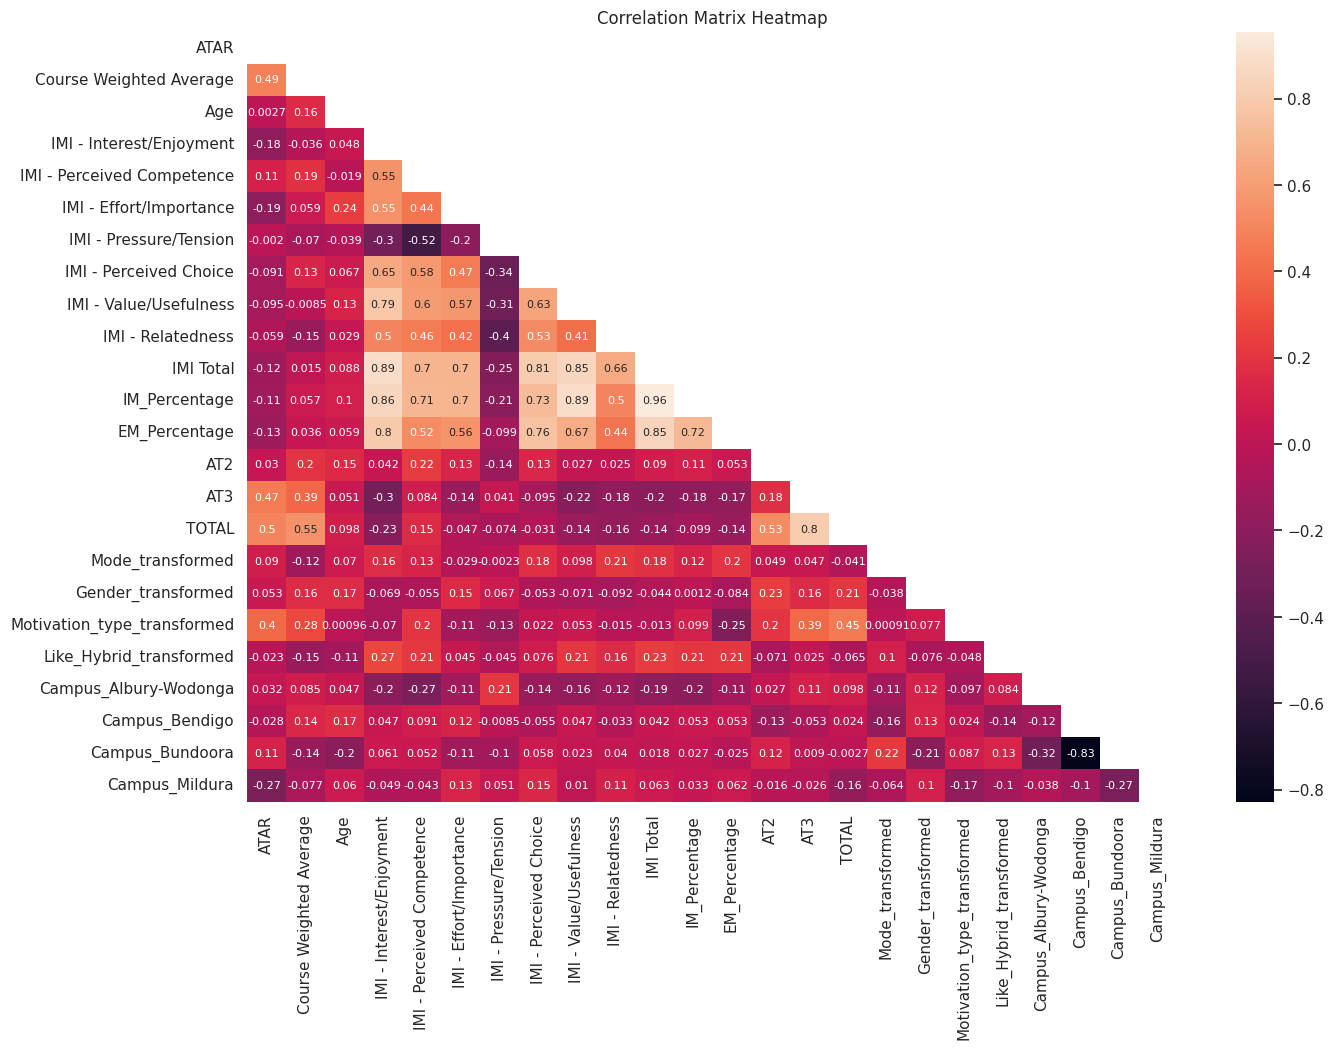

In [105]:
sns.set_theme(style="white")
plt.figure(figsize=(15,10))
sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))
plt.title('Correlation Matrix Heatmap')
plt.show()

1.   ***Upon examining the dataset, it has been noted that the variables 'ATAR' and 'Course Weighted Average' are highly correlated. This observation necessitates the exclusion of one of these variables to uphold the integrity of our linear regression model, as high multicollinearity can distort the model's accuracy. To make an informed decision about which variable to eliminate, we will assess the correlation of both 'ATAR' and 'Course Weighted Average' with the target variable, 'AT3'. This approach ensures that the variable retained is the one with a more significant relationship with the target, thereby enhancing the predictive capability of our model.***
2.   ***After reviewing the correlation plot, it has been determined that 'Course Weighted Average' exhibits a lower correlation with 'ATAR' compared to its correlation with the target variable 'AT3'. Consequently, to mitigate the effects of multicollinearity in our linear regression model, 'Course Weighted Average' will be removed. This decision is rooted in the principle of retaining variables that maintain stronger correlations with the target variable, thereby ensuring the model's effectiveness and accuracy in predictions. The removal of 'Course Weighted Average' is a strategic step towards refining the model and enhancing its predictive reliability.***

In [106]:
hybrid_data_encoded.drop(columns=["Course Weighted Average"],inplace=True)
hybrid_data_encoded

,Mode,ATAR,Age,Gender,IMI - Interest/Enjoyment,IMI - Perceived Competence,IMI - Effort/Importance,IMI - Pressure/Tension,IMI - Perceived Choice,IMI - Value/Usefulness,...,AT3,TOTAL,Mode_transformed,Gender_transformed,Motivation_type_transformed,Like_Hybrid_transformed,Campus_Albury-Wodonga,Campus_Bendigo,Campus_Bundoora,Campus_Mildura
0,Online/Zoom,1.296722,0.047924,Female,-0.928296,-0.587867,-0.890775,-0.936443,-1.182454,-0.594235,...,89.0,1.471178,0,1,1,1,0,0,1,0
1,Online/Zoom,-3.225613,-0.233630,Female,-1.584385,0.468047,1.515341,0.060074,-0.851648,-1.243748,...,75.0,-0.421399,0,1,0,1,0,1,0,0
2,Online/Zoom,1.026907,-0.374408,Female,-0.928296,0.468047,-0.409552,-0.604270,-0.520843,0.055278,...,80.0,0.808085,0,1,1,0,0,0,1,0
3,Online/Zoom,-0.876462,-0.374408,Female,1.477364,0.468047,0.552895,-1.268615,0.802379,1.354303,...,52.0,-0.419557,0,1,0,1,0,0,1,0
4,Online/Zoom,-0.530395,3.708133,Female,-0.490903,-0.587867,1.034118,0.392246,-0.520843,0.380034,...,86.0,1.029116,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hybrid/Class.com,-0.568521,0.892588,Female,-0.928296,-0.587867,-0.890775,1.388762,-1.182454,-0.594235,...,90.0,-0.134980,1,1,0,1,0,0,1,0
115,Online/Zoom,-1.116949,-0.233630,Female,1.258667,0.820018,1.515341,-0.936443,1.463990,0.380034,...,81.0,0.075921,0,1,0,1,0,0,1,0
116,Hybrid/Class.com,0.261454,-0.515185,Female,0.602578,0.820018,1.515341,0.392246,-0.520843,0.704790,...,91.0,1.053982,1,1,1,1,0,0,1,0
117,Online/Zoom,-0.638908,-0.515185,Female,0.383882,0.468047,1.515341,-0.604270,0.471574,0.380034,...,73.0,-0.471131,0,1,0,1,0,0,1,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-107-81dcaa5bbe94>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))


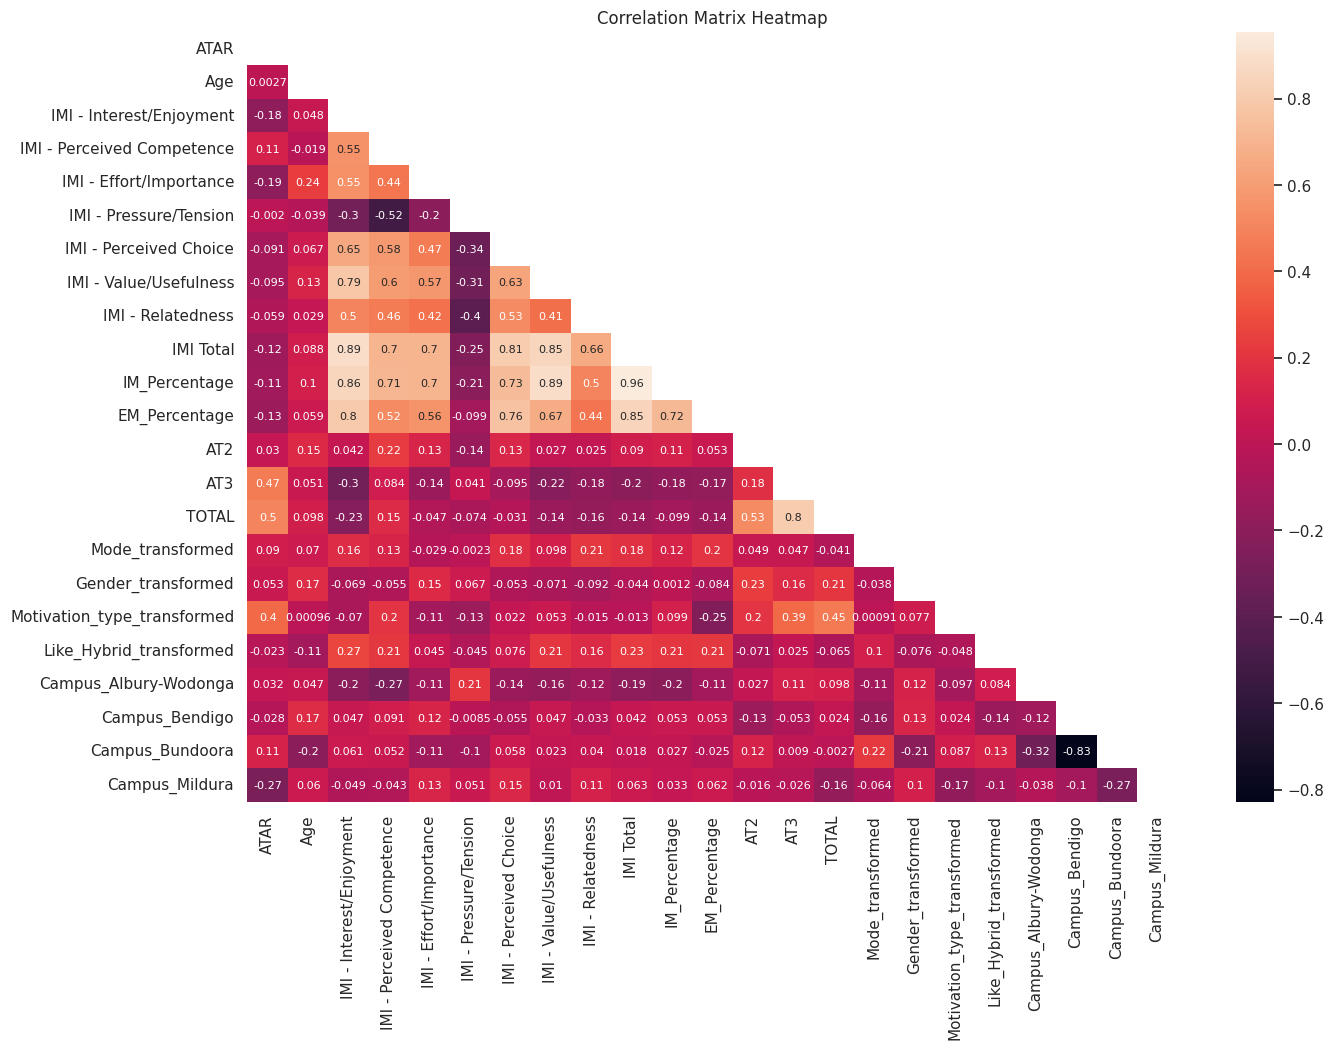

In [107]:
sns.set_theme(style="white")
plt.figure(figsize=(15,10))
sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))
plt.title('Correlation Matrix Heatmap')
plt.show()

1. ***Upon further analysis, it has been observed that 'IMI_Total' is highly correlated with the 'Interest/Enjoyment' sub-scale, which is logical given that 'IMI_Total' represents the cumulative measure of all IMI sub-scales. This presents us with two distinct choices in the context of refining our linear regression model:***
    *   **Retain IMI_Total**: ***We could choose to keep 'IMI_Total' and remove the other seven sub-scales. This approach simplifies the model by using 'IMI_Total' as a comprehensive measure that encapsulates the essence of all individual IMI sub-scales. It offers a broad perspective on the overall IMI effect.***
    *   **Retain Select IMI Sub-scales**: ***Alternatively, we could remove 'IMI_Total' to maintain a selection of individual IMI sub-scales, particularly those that are not significantly correlated with each other. This strategy allows us to investigate the distinct impact of each IMI sub-scale on the target variable, providing insights into the unique contributions of different motivational aspects.***

2. ***Each option has its merits, with the former leaning towards model simplicity and the latter offering detailed insights into the specific influences of individual motivational factors. The choice depends on the specific objectives and requirements of our analysis.***
3. ***So lets proceed with removing IMI_Total***

<ipython-input-108-1834a8f99326>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))


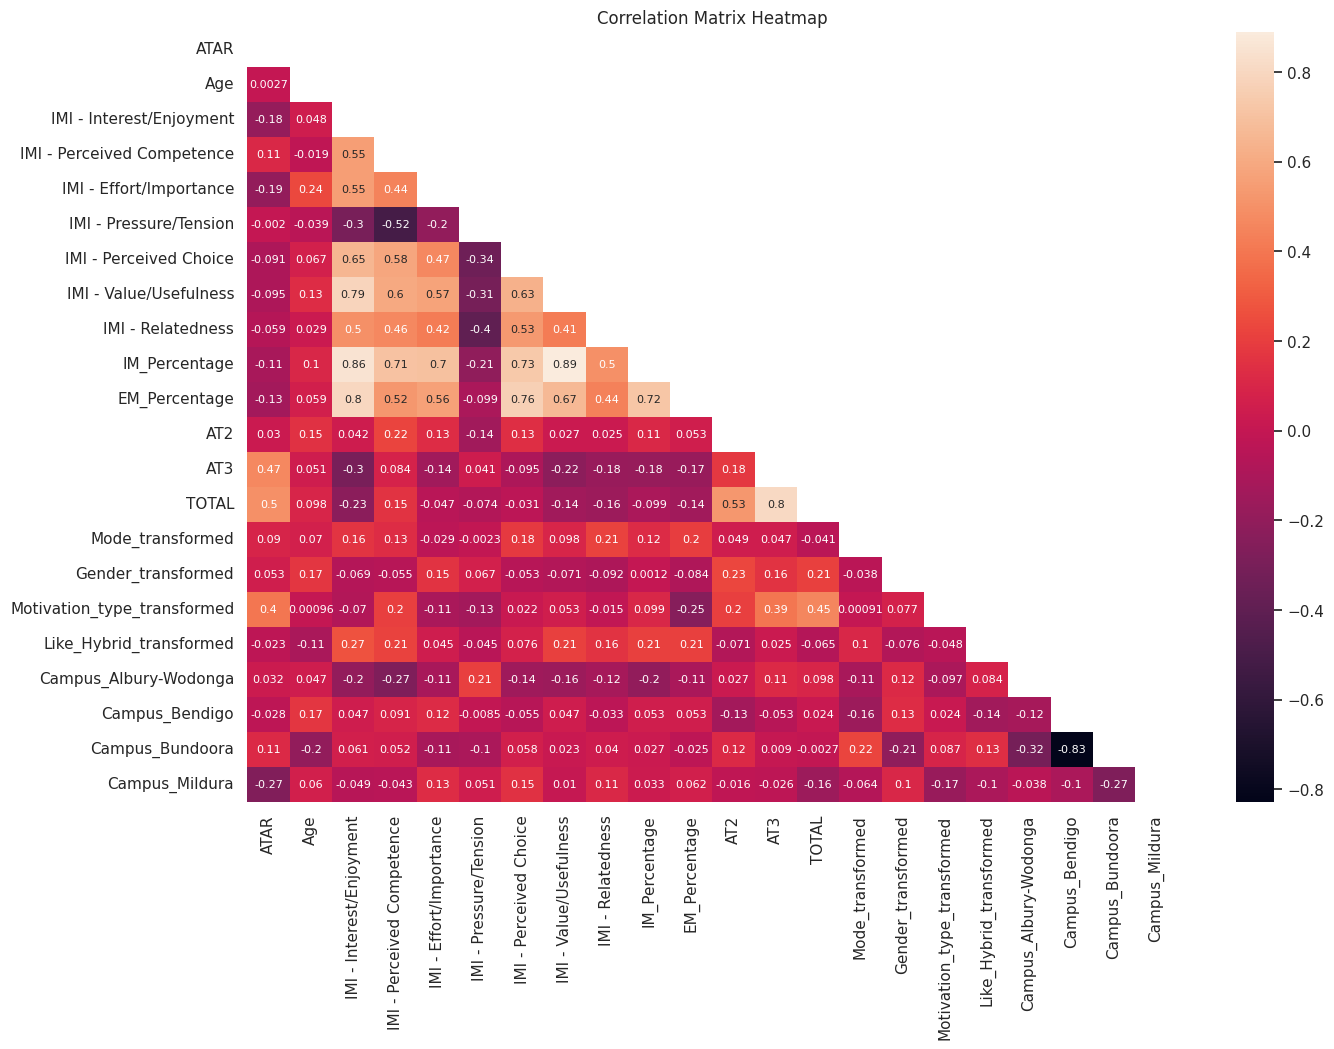

,Mode,ATAR,Age,Gender,IMI - Interest/Enjoyment,IMI - Perceived Competence,IMI - Effort/Importance,IMI - Pressure/Tension,IMI - Perceived Choice,IMI - Value/Usefulness,...,AT3,TOTAL,Mode_transformed,Gender_transformed,Motivation_type_transformed,Like_Hybrid_transformed,Campus_Albury-Wodonga,Campus_Bendigo,Campus_Bundoora,Campus_Mildura
0,Online/Zoom,1.296722,0.047924,Female,-0.928296,-0.587867,-0.890775,-0.936443,-1.182454,-0.594235,...,89.0,1.471178,0,1,1,1,0,0,1,0
1,Online/Zoom,-3.225613,-0.233630,Female,-1.584385,0.468047,1.515341,0.060074,-0.851648,-1.243748,...,75.0,-0.421399,0,1,0,1,0,1,0,0
2,Online/Zoom,1.026907,-0.374408,Female,-0.928296,0.468047,-0.409552,-0.604270,-0.520843,0.055278,...,80.0,0.808085,0,1,1,0,0,0,1,0
3,Online/Zoom,-0.876462,-0.374408,Female,1.477364,0.468047,0.552895,-1.268615,0.802379,1.354303,...,52.0,-0.419557,0,1,0,1,0,0,1,0
4,Online/Zoom,-0.530395,3.708133,Female,-0.490903,-0.587867,1.034118,0.392246,-0.520843,0.380034,...,86.0,1.029116,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hybrid/Class.com,-0.568521,0.892588,Female,-0.928296,-0.587867,-0.890775,1.388762,-1.182454,-0.594235,...,90.0,-0.134980,1,1,0,1,0,0,1,0
115,Online/Zoom,-1.116949,-0.233630,Female,1.258667,0.820018,1.515341,-0.936443,1.463990,0.380034,...,81.0,0.075921,0,1,0,1,0,0,1,0
116,Hybrid/Class.com,0.261454,-0.515185,Female,0.602578,0.820018,1.515341,0.392246,-0.520843,0.704790,...,91.0,1.053982,1,1,1,1,0,0,1,0
117,Online/Zoom,-0.638908,-0.515185,Female,0.383882,0.468047,1.515341,-0.604270,0.471574,0.380034,...,73.0,-0.471131,0,1,0,1,0,0,1,0


In [108]:
hybrid_data_encoded.drop(columns=["IMI Total"],inplace=True)
sns.set_theme(style="white")
plt.figure(figsize=(15,10))
sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))
plt.title('Correlation Matrix Heatmap')
plt.show()
hybrid_data_encoded

***The observation that 'TOTAL' is closely related to 'AT3' raises a pertinent question regarding the inclusion of 'TOTAL' in our linear regression model. While it might seem counterintuitive to remove a variable that is correlated with the target, the rationale for excluding 'TOTAL' is grounded in the specific focus of our analysis. 'TOTAL' represents the aggregate of all grades, while 'AT3' specifically pertains to the grade achieved after the introduction of the Hybrid Mode. Our primary objective is to examine the impact of various factors on 'AT3', which is a distinct and targeted measure. Including 'TOTAL' in the model could overshadow the specific insights we aim to glean about 'AT3', especially since 'TOTAL' encompasses broader academic performance. Therefore, to maintain the clarity and specificity of our analysis towards understanding the effects on 'AT3', we opt to remove 'TOTAL' from our model. This decision aligns with our analytical goal of closely examining the outcomes associated with the Hybrid Mode, as reflected in the 'AT3' grades.***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-109-0aa992813864>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))


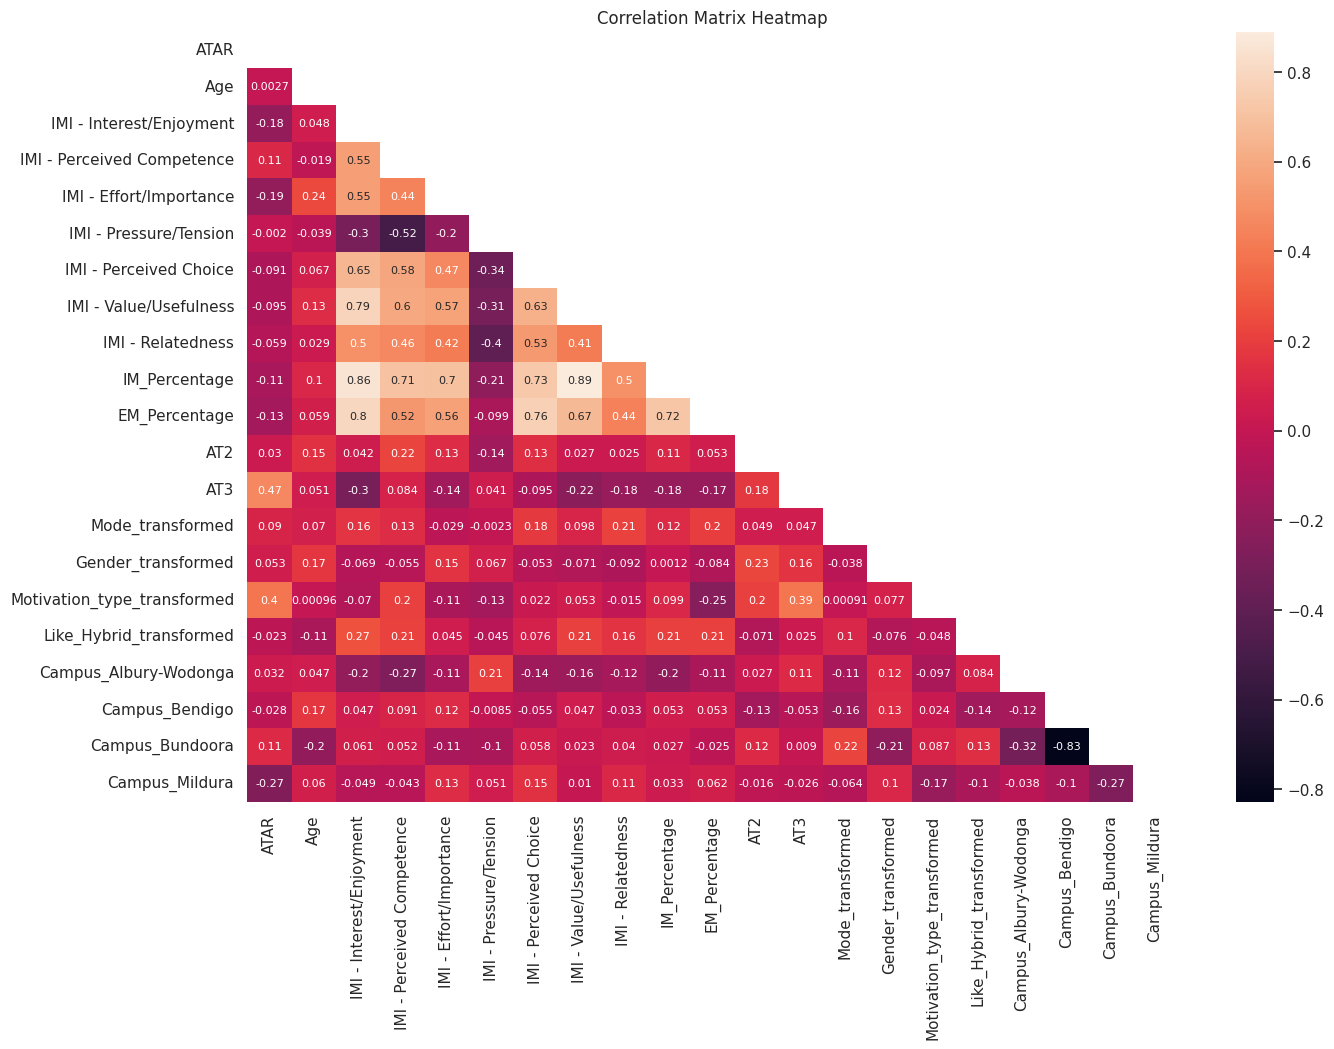

,Mode,ATAR,Age,Gender,IMI - Interest/Enjoyment,IMI - Perceived Competence,IMI - Effort/Importance,IMI - Pressure/Tension,IMI - Perceived Choice,IMI - Value/Usefulness,...,AT2,AT3,Mode_transformed,Gender_transformed,Motivation_type_transformed,Like_Hybrid_transformed,Campus_Albury-Wodonga,Campus_Bendigo,Campus_Bundoora,Campus_Mildura
0,Online/Zoom,1.296722,0.047924,Female,-0.928296,-0.587867,-0.890775,-0.936443,-1.182454,-0.594235,...,0.775548,89.0,0,1,1,1,0,0,1,0
1,Online/Zoom,-3.225613,-0.233630,Female,-1.584385,0.468047,1.515341,0.060074,-0.851648,-1.243748,...,0.344178,75.0,0,1,0,1,0,1,0,0
2,Online/Zoom,1.026907,-0.374408,Female,-0.928296,0.468047,-0.409552,-0.604270,-0.520843,0.055278,...,0.775548,80.0,0,1,1,0,0,0,1,0
3,Online/Zoom,-0.876462,-0.374408,Female,1.477364,0.468047,0.552895,-1.268615,0.802379,1.354303,...,0.775548,52.0,0,1,0,1,0,0,1,0
4,Online/Zoom,-0.530395,3.708133,Female,-0.490903,-0.587867,1.034118,0.392246,-0.520843,0.380034,...,0.775548,86.0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hybrid/Class.com,-0.568521,0.892588,Female,-0.928296,-0.587867,-0.890775,1.388762,-1.182454,-0.594235,...,-0.087192,90.0,1,1,0,1,0,0,1,0
115,Online/Zoom,-1.116949,-0.233630,Female,1.258667,0.820018,1.515341,-0.936443,1.463990,0.380034,...,0.344178,81.0,0,1,0,1,0,0,1,0
116,Hybrid/Class.com,0.261454,-0.515185,Female,0.602578,0.820018,1.515341,0.392246,-0.520843,0.704790,...,0.775548,91.0,1,1,1,1,0,0,1,0
117,Online/Zoom,-0.638908,-0.515185,Female,0.383882,0.468047,1.515341,-0.604270,0.471574,0.380034,...,-0.949931,73.0,0,1,0,1,0,0,1,0


In [109]:
hybrid_data_encoded.drop(columns=["TOTAL"],inplace=True)
sns.set_theme(style="white")
plt.figure(figsize=(15,10))
sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))
plt.title('Correlation Matrix Heatmap')
plt.show()
hybrid_data_encoded

***The observation that both 'IMI-Value/Usefulness' and 'IMI-Interest/Enjoyment' demonstrate high correlation with 'IM_Percentage' necessitates a strategic decision in the context of our linear regression analysis. Given that 'IM_Percentage' encapsulates aspects of intrinsic motivation, its strong correlation with these specific IMI sub-scales suggests a degree of redundancy. To streamline our model and avoid potential multicollinearity issues, it is prudent to remove 'IMI-Value/Usefulness' and 'IMI-Interest/Enjoyment' from the set of independent variables. By doing so, we are essentially allowing 'IM_Percentage' to serve as a representative measure of intrinsic motivation, capturing the essence of these sub-scales while maintaining model simplicity and efficiency. This approach aligns with the goal of creating a more robust and focused regression model, capable of yielding clear insights into the factors influencing 'AT3' without the complication of highly inter-correlated variables.***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-110-973b26242391>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))


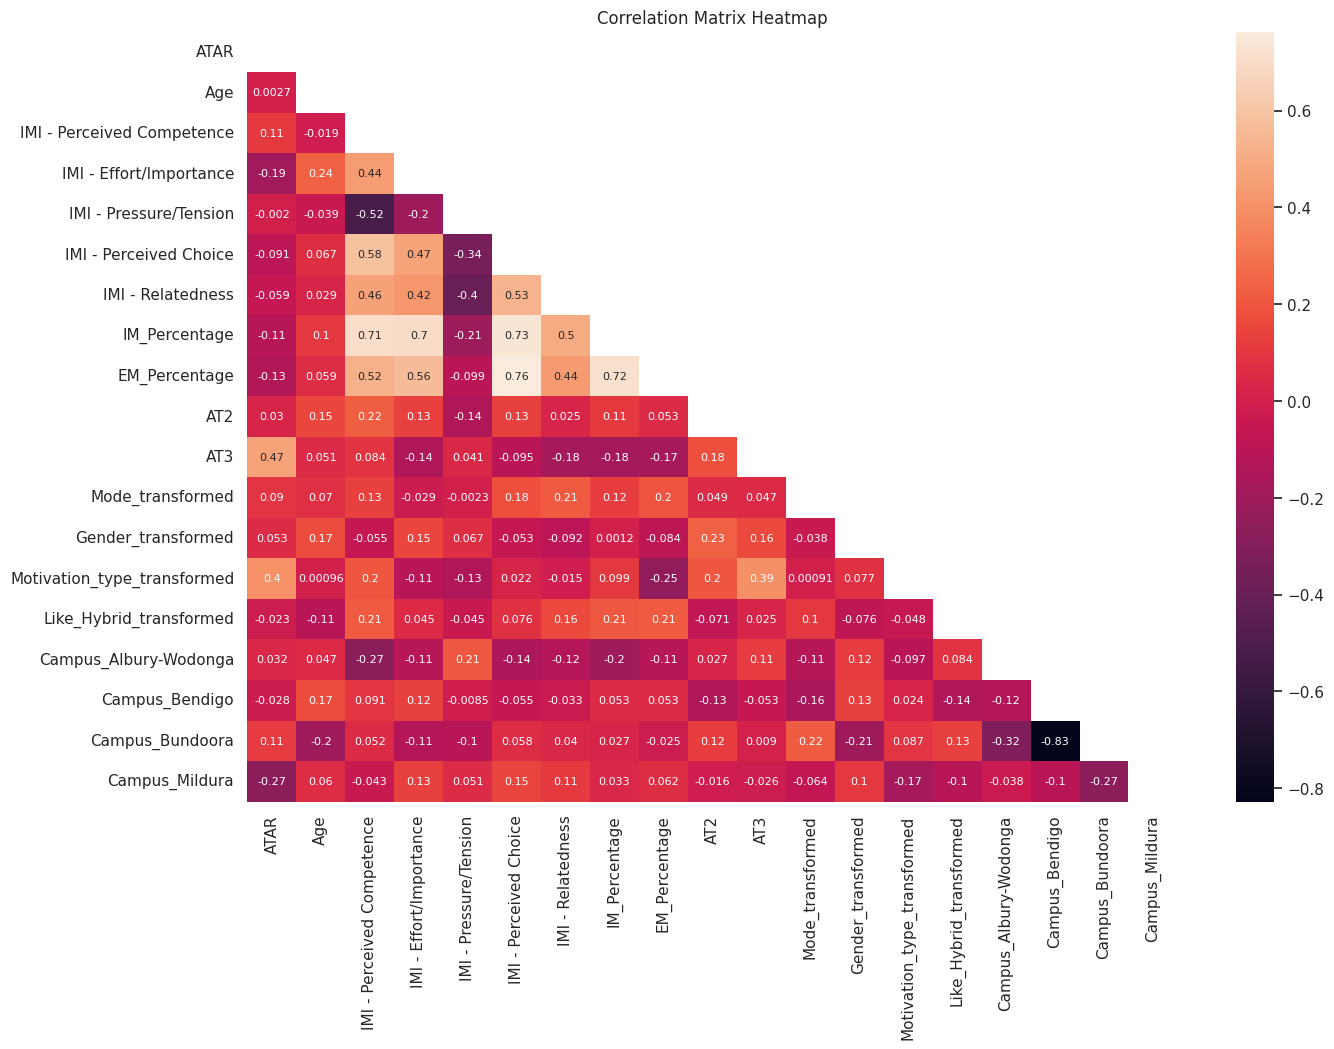

,Mode,ATAR,Age,Gender,IMI - Perceived Competence,IMI - Effort/Importance,IMI - Pressure/Tension,IMI - Perceived Choice,IMI - Relatedness,IM_Percentage,...,AT2,AT3,Mode_transformed,Gender_transformed,Motivation_type_transformed,Like_Hybrid_transformed,Campus_Albury-Wodonga,Campus_Bendigo,Campus_Bundoora,Campus_Mildura
0,Online/Zoom,1.296722,0.047924,Female,-0.587867,-0.890775,-0.936443,-1.182454,-0.393170,-1.184707,...,0.775548,89.0,0,1,1,1,0,0,1,0
1,Online/Zoom,-3.225613,-0.233630,Female,0.468047,1.515341,0.060074,-0.851648,-0.060215,-0.614203,...,0.344178,75.0,0,1,0,1,0,1,0,0
2,Online/Zoom,1.026907,-0.374408,Female,0.468047,-0.409552,-0.604270,-0.520843,1.604558,-0.271900,...,0.775548,80.0,0,1,1,0,0,0,1,0
3,Online/Zoom,-0.876462,-0.374408,Female,0.468047,0.552895,-1.268615,0.802379,-0.060215,0.869109,...,0.775548,52.0,0,1,0,1,0,0,1,0
4,Online/Zoom,-0.530395,3.708133,Female,-0.587867,1.034118,0.392246,-0.520843,-2.057943,-0.271900,...,0.775548,86.0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hybrid/Class.com,-0.568521,0.892588,Female,-0.587867,-0.890775,1.388762,-1.182454,-2.057943,-0.842404,...,-0.087192,90.0,1,1,0,1,0,0,1,0
115,Online/Zoom,-1.116949,-0.233630,Female,0.820018,1.515341,-0.936443,1.463990,0.605694,0.755008,...,0.344178,81.0,0,1,0,1,0,0,1,0
116,Hybrid/Class.com,0.261454,-0.515185,Female,0.820018,1.515341,0.392246,-0.520843,1.271603,1.097310,...,0.775548,91.0,1,1,1,1,0,0,1,0
117,Online/Zoom,-0.638908,-0.515185,Female,0.468047,1.515341,-0.604270,0.471574,0.272739,0.869109,...,-0.949931,73.0,0,1,0,1,0,0,1,0


In [110]:
hybrid_data_encoded.drop(columns=["IMI - Interest/Enjoyment","IMI - Value/Usefulness"],inplace=True)
sns.set_theme(style="white")
plt.figure(figsize=(15,10))
sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))
plt.title('Correlation Matrix Heatmap')
plt.show()
hybrid_data_encoded

***Similarly remove "IMI - Perceived Choice","IMI - Perceived Competence","IMI - Effort/Importance","IMI - Relatedness","EM_Percentage" by repetatively comparing the correlation plot***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-111-48d52a82909c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))


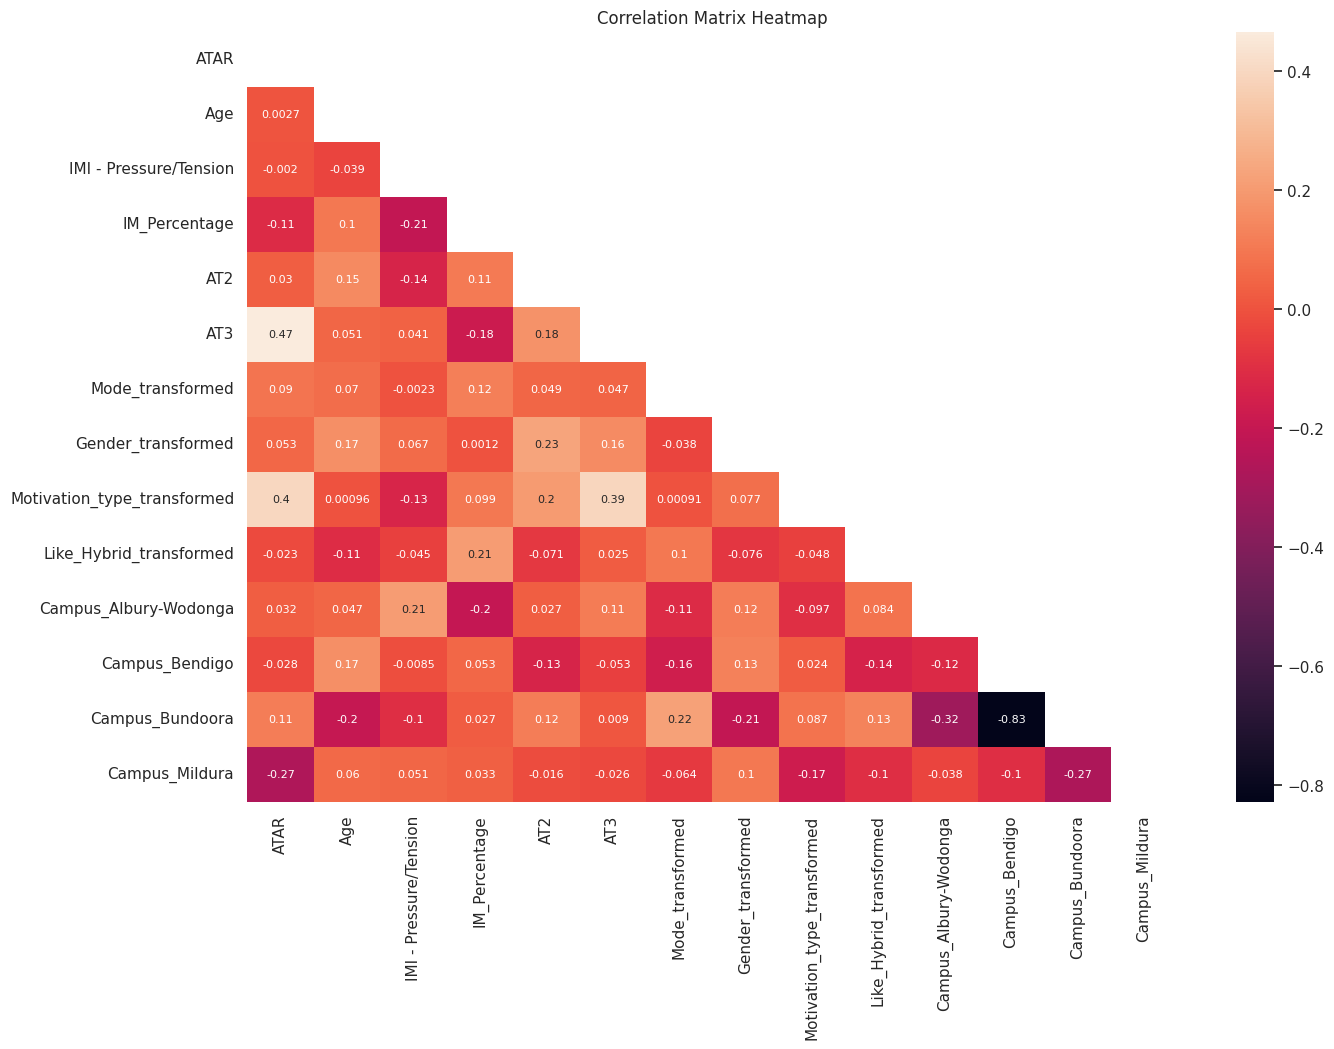

,Mode,ATAR,Age,Gender,IMI - Pressure/Tension,IM_Percentage,Motivation_Type,Like_Hybrid,AT2,AT3,Mode_transformed,Gender_transformed,Motivation_type_transformed,Like_Hybrid_transformed,Campus_Albury-Wodonga,Campus_Bendigo,Campus_Bundoora,Campus_Mildura
0,Online/Zoom,1.296722,0.047924,Female,-0.936443,-1.184707,INTRINSIC,YES,0.775548,89.0,0,1,1,1,0,0,1,0
1,Online/Zoom,-3.225613,-0.233630,Female,0.060074,-0.614203,EXTRINSIC,YES,0.344178,75.0,0,1,0,1,0,1,0,0
2,Online/Zoom,1.026907,-0.374408,Female,-0.604270,-0.271900,INTRINSIC,NO,0.775548,80.0,0,1,1,0,0,0,1,0
3,Online/Zoom,-0.876462,-0.374408,Female,-1.268615,0.869109,EXTRINSIC,YES,0.775548,52.0,0,1,0,1,0,0,1,0
4,Online/Zoom,-0.530395,3.708133,Female,0.392246,-0.271900,EXTRINSIC,YES,0.775548,86.0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Hybrid/Class.com,-0.568521,0.892588,Female,1.388762,-0.842404,EXTRINSIC,YES,-0.087192,90.0,1,1,0,1,0,0,1,0
115,Online/Zoom,-1.116949,-0.233630,Female,-0.936443,0.755008,EXTRINSIC,YES,0.344178,81.0,0,1,0,1,0,0,1,0
116,Hybrid/Class.com,0.261454,-0.515185,Female,0.392246,1.097310,INTRINSIC,YES,0.775548,91.0,1,1,1,1,0,0,1,0
117,Online/Zoom,-0.638908,-0.515185,Female,-0.604270,0.869109,EXTRINSIC,YES,-0.949931,73.0,0,1,0,1,0,0,1,0


In [111]:
hybrid_data_encoded.drop(columns=["IMI - Perceived Choice","IMI - Perceived Competence","IMI - Effort/Importance","IMI - Relatedness","EM_Percentage"],inplace=True)
sns.set_theme(style="white")
plt.figure(figsize=(15,10))
sns.heatmap(hybrid_data_encoded.corr(),annot=True,annot_kws={"size": 8},mask = np.triu(np.ones_like(hybrid_data_encoded.corr(), dtype=bool)))
plt.title('Correlation Matrix Heatmap')
plt.show()
hybrid_data_encoded

In [112]:
# Assuming you have a DataFrame 'hybrid_data_encoded' with features and target variable
# Dropping the non-numeric columns
X = hybrid_data_encoded.drop(columns=["Mode", "Gender", "Motivation_Type", "Like_Hybrid","AT3"])  # Example feature columns
y = hybrid_data_encoded['AT3']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.957 ,random_state=1)

# Create a Linear Regression model
model = LinearRegression(fit_intercept=False)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R-squared
n = len(y)  # Number of observations
p = X.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Root Mean Squared Error:", np.sqrt(mse))
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


Root Mean Squared Error: 6.045811363014065
R-squared: 0.7984570189835135
Adjusted R-squared: 0.7657062845683344


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 9. Support Vector Machine

***We use Support vector Machine because we have limited data and SVM works well and is suited For datasets of smaller size***

In [113]:
# Assuming you have a DataFrame 'df' with features and a target variable
# Replace 'features' with your feature columns and 'target' with your target column
X = hybrid_data_transformed_classification.drop(['Motivation_type_transformed',"Motivation_Type","Mode", "Gender", "Motivation_Type", "Like_Hybrid"], axis=1)  # Example feature columns
y = hybrid_data_transformed_classification['Motivation_type_transformed']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)


# Define the model
svm_model = SVC(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    "kernel":["linear","rbf"]
}

# Grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=10, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)


# Evaluate on the test set
best_model = SVC(**grid_search.best_params_,random_state=1)
best_model.fit(X_train,y_train)
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test Set Score: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# Testing the Model Performance

In [114]:
#Creating Test data for testing the Model
atar = 99.99
wam=76
Age = 27
ie=4
pc=5
ei=4
pt = 5
pc=4
vu=3
rel=4
imit=ie+pc+ei+pt+pc+vu+rel
imp = 75
emp=35
at2 = 18
at3 = 90
total=93
Mode = "Hybrid/Class.com"
Gender = "Female"
lh = "YES"
campus = "Bundoora"

data = {
    "ATAR": [atar],
    "Course Weighted Average": [wam],
    "Age": [Age],
    "IMI - Interest/Enjoyment": [ie],
    "IMI - Perceived Competence": [pc],
    "IMI - Effort/Importance": [ei],
    "IMI - Pressure/Tension": [pt],
    "IMI - Perceived Choice": [pc],
    "IMI - Value/Usefulness": [vu],
    "IMI - Relatedness": [rel],
    "IMI Total": [imit],
    "IM_Percentage": [imp],
    "EM_Percentage": [emp],
    "AT2": [at2],
    "AT3": [at3],
    "TOTAL": [total],
    "Mode": [Mode],
    "Gender": [Gender],
    "LKH": [lh],
    "Campus": [campus]
}

test_data = pd.DataFrame(data)
if campus == "Bundoora":
    test_data["Campus_Albury-Wodonga"]=0
    test_data["Campus_Bendigo"]=0
    test_data["Campus_Bundoora"] = 1
    test_data["Campus_Mildura"]=0
elif campus == "Bendigo":
    test_data["Campus_Albury-Wodonga"]=0
    test_data["Campus_Bendigo"]=1
    test_data["Campus_Bundoora"] = 0
    test_data["Campus_Mildura"]=0
elif campus == "Mildura":
    test_data["Campus_Albury-Wodonga"]=0
    test_data["Campus_Bendigo"]=0
    test_data["Campus_Bundoora"] = 0
    test_data["Campus_Mildura"]=1
else:
  test_data["Campus_Albury-Wodonga"]=1
  test_data["Campus_Bendigo"]=0
  test_data["Campus_Bundoora"] = 0
  test_data["Campus_Mildura"]=0


if Mode=="Hybrid/Class.com":
  test_data["Mode"]=1
else:
  test_data["Mode"]=0

if Gender=="Female":
  test_data["Gender"]=1
else:
  test_data["Gender"]=0

if lh=="YES":
  test_data["LKH"]=1
else:
  test_data["LKH"]=0
test_data.drop(columns=["Campus"],inplace=True)
test_data[['ATAR',"Course Weighted Average" ,'Age', "IMI - Interest/Enjoyment","IMI - Perceived Competence","IMI - Effort/Importance","IMI - Pressure/Tension","IMI - Perceived Choice","IMI - Value/Usefulness",'IMI - Relatedness',"IMI Total" ,'IM_Percentage',"EM_Percentage" ,'AT2',"TOTAL"]]=sc.transform(test_data[['ATAR',"Course Weighted Average" ,'Age', "IMI - Interest/Enjoyment","IMI - Perceived Competence","IMI - Effort/Importance","IMI - Pressure/Tension","IMI - Perceived Choice","IMI - Value/Usefulness",'IMI - Relatedness',"IMI Total" ,'IM_Percentage',"EM_Percentage" ,'AT2',"TOTAL"]])
test_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ATAR,Course Weighted Average,Age,IMI - Interest/Enjoyment,IMI - Perceived Competence,IMI - Effort/Importance,IMI - Pressure/Tension,IMI - Perceived Choice,IMI - Value/Usefulness,IMI - Relatedness,...,AT2,AT3,TOTAL,Mode,Gender,LKH,Campus_Albury-Wodonga,Campus_Bendigo,Campus_Bundoora,Campus_Mildura
0,1.498497,0.099027,0.75181,-2.677867,-3.755606,-2.815667,-1.268615,-3.167287,-3.841799,-3.056807,...,0.775548,90,1.403948,1,1,1,0,0,1,0


In [115]:
result=best_model.predict(test_data.values)[0]
if result==1 and Gender=="Female":
  print("The Student is Intrinsically Motivated For her Academics")
elif result==1 and Gender=="Male":
  print("The Student is Intrinsically Motivated For his Academics")
elif result==0 and Gender=="Male":
  print("The Student is Extrinsically Motivated For his Academics")
elif result==0 and Gender=="Female":
 print("The Student is Extrinsically Motivated For her Academics")

The Student is Intrinsically Motivated For her Academics


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
